In [230]:
import pandas as pd


In [231]:
#Import the data and remove rows containing NAN values
df = pd.read_csv('googfin.csv')
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Volume
0,"Mar 23, 2020",53.07,53.57,50.68,52.83,"4,044,137"
1,"Mar 24, 2020",55.19,56.75,54.53,56.72,"3,344,450"
2,"Mar 25, 2020",56.32,57.45,54.30,55.12,"4,081,528"
3,"Mar 26, 2020",55.59,58.50,54.68,58.09,"3,573,755"
4,"Mar 27, 2020",56.28,57.53,55.30,55.54,"3,208,495"


In [232]:
df1=df.reset_index()['High']

In [233]:
df1

0      53.57
1      56.75
2      57.45
3      58.50
4      57.53
       ...  
696    90.10
697    89.50
698    88.52
699    89.37
700    88.83
Name: High, Length: 701, dtype: float64

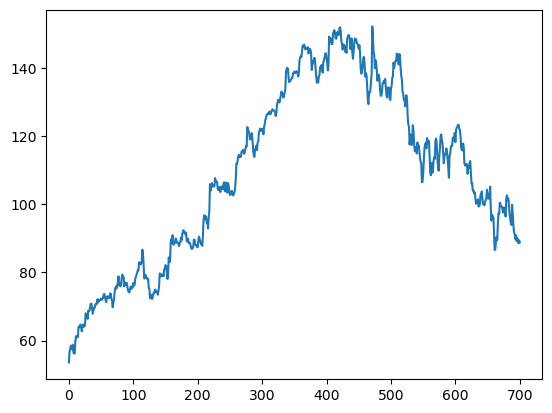

In [234]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [235]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 


In [236]:
import numpy as np

In [237]:
df1

0      53.57
1      56.75
2      57.45
3      58.50
4      57.53
       ...  
696    90.10
697    89.50
698    88.52
699    89.37
700    88.83
Name: High, Length: 701, dtype: float64

In [238]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [239]:
df1

array([[0.        ],
       [0.03227443],
       [0.03937887],
       [0.05003552],
       [0.0401908 ],
       [0.04069826],
       [0.0527758 ],
       [0.02953415],
       [0.02811326],
       [0.02648939],
       [0.06251903],
       [0.0779458 ],
       [0.07490105],
       [0.07825028],
       [0.07571298],
       [0.106871  ],
       [0.10605907],
       [0.10534862],
       [0.1131635 ],
       [0.10666802],
       [0.09276363],
       [0.10869786],
       [0.11265604],
       [0.10605907],
       [0.11407693],
       [0.10991576],
       [0.14645286],
       [0.14279915],
       [0.14239318],
       [0.13001116],
       [0.15355729],
       [0.15213641],
       [0.15538415],
       [0.16614229],
       [0.17517507],
       [0.17436314],
       [0.15934233],
       [0.14513346],
       [0.15376028],
       [0.16289455],
       [0.16269157],
       [0.17202882],
       [0.17456612],
       [0.17324673],
       [0.18755709],
       [0.17781386],
       [0.1874556 ],
       [0.183

In [240]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [241]:

training_size,test_size

(525, 176)

In [242]:
train_data

array([[0.        ],
       [0.03227443],
       [0.03937887],
       [0.05003552],
       [0.0401908 ],
       [0.04069826],
       [0.0527758 ],
       [0.02953415],
       [0.02811326],
       [0.02648939],
       [0.06251903],
       [0.0779458 ],
       [0.07490105],
       [0.07825028],
       [0.07571298],
       [0.106871  ],
       [0.10605907],
       [0.10534862],
       [0.1131635 ],
       [0.10666802],
       [0.09276363],
       [0.10869786],
       [0.11265604],
       [0.10605907],
       [0.11407693],
       [0.10991576],
       [0.14645286],
       [0.14279915],
       [0.14239318],
       [0.13001116],
       [0.15355729],
       [0.15213641],
       [0.15538415],
       [0.16614229],
       [0.17517507],
       [0.17436314],
       [0.15934233],
       [0.14513346],
       [0.15376028],
       [0.16289455],
       [0.16269157],
       [0.17202882],
       [0.17456612],
       [0.17324673],
       [0.18755709],
       [0.17781386],
       [0.1874556 ],
       [0.183

In [243]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [244]:

# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [245]:
print(X_train.shape), print(y_train.shape)

(424, 100)
(424,)


(None, None)

In [246]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [247]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [248]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [250]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [251]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [252]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 3s 160ms/step - loss: 0.1876 - val_loss: 0.1204
Epoch 2/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0316 - val_loss: 0.0021
Epoch 3/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0194 - val_loss: 0.0205
Epoch 4/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0095 - val_loss: 0.0195
Epoch 5/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0059 - val_loss: 0.0063
Epoch 6/100
7/7 [==============================] - 1s 85ms/step - loss: 0.0041 - val_loss: 0.0175
Epoch 7/100
7/7 [==============================] - 1s 83ms/step - loss: 0.0037 - val_loss: 0.0074
Epoch 8/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0030 - val_loss: 0.0091
Epoch 9/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0026 - val_loss: 0.0074
Epoch 10/100
7/7 [==============================] - 1s 83ms/step - loss: 0.0022 - val_loss: 0.0064
Epoch 11/100
7/7 [

Epoch 84/100
7/7 [==============================] - 1s 83ms/step - loss: 0.0016 - val_loss: 0.0047
Epoch 85/100
7/7 [==============================] - 1s 85ms/step - loss: 0.0016 - val_loss: 0.0051
Epoch 86/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0016 - val_loss: 0.0050
Epoch 87/100
7/7 [==============================] - 1s 83ms/step - loss: 0.0016 - val_loss: 0.0046
Epoch 88/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0016 - val_loss: 0.0042
Epoch 89/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0016 - val_loss: 0.0050
Epoch 90/100
7/7 [==============================] - 1s 83ms/step - loss: 0.0015 - val_loss: 0.0045
Epoch 91/100
7/7 [==============================] - 1s 87ms/step - loss: 0.0015 - val_loss: 0.0042
Epoch 92/100
7/7 [==============================] - 1s 85ms/step - loss: 0.0016 - val_loss: 0.0039
Epoch 93/100
7/7 [==============================] - 1s 83ms/step - loss: 0.0015 - val_loss: 0.0054
Epoch 94/1

In [253]:
import tensorflow as tf

In [254]:
tf.__version__

'2.10.0'

In [255]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 16ms/step


In [256]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [257]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

119.50296064112642

In [258]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

101.73422680406878

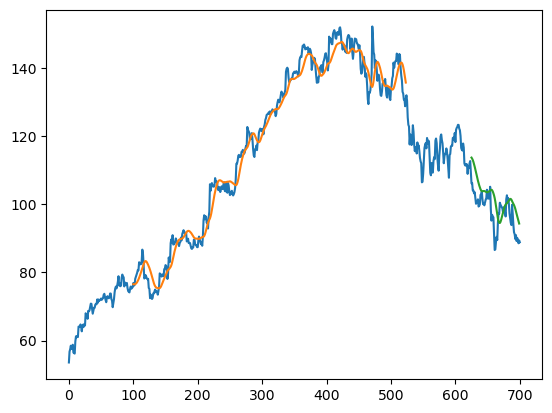

In [259]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [260]:
len(test_data)

176

In [261]:
x_input=test_data[76:].reshape(1,-1)
x_input.shape

(1, 100)

In [262]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [263]:
temp_input

[0.6922764640211103,
 0.6979600121790317,
 0.7011062620521669,
 0.7072972698670457,
 0.7069927940728713,
 0.6960316654825942,
 0.6913630366385872,
 0.6742109002334313,
 0.6386887242464223,
 0.6329036841571096,
 0.6307723535978889,
 0.6516796914645286,
 0.6397036435603369,
 0.5926113873947021,
 0.5866233634426063,
 0.5906830406982644,
 0.5851009844717345,
 0.5897696133157415,
 0.5613518725261342,
 0.5827666700497309,
 0.5786055008626814,
 0.593017355120268,
 0.5995128387293209,
 0.5663249771643155,
 0.5331371155993099,
 0.5342535268446158,
 0.5121282858012788,
 0.5120267938698873,
 0.5033999797016138,
 0.5066477215061402,
 0.4882776819242871,
 0.47234344869582867,
 0.47569268243174667,
 0.4758956662945295,
 0.4854359078453263,
 0.46412260225312085,
 0.46605094894955834,
 0.4709225616563484,
 0.4988328427889983,
 0.49903582665178114,
 0.5090835278595351,
 0.48563889170810914,
 0.4711255455191312,
 0.4724449406272202,
 0.4676748198518219,
 0.47660610981426976,
 0.4843194966000204,
 0.4891

# # demonstrate prediction for next 30 days


In [264]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.4020811]
101
1 day input [0.69796001 0.70110626 0.70729727 0.70699279 0.69603167 0.69136304
 0.6742109  0.63868872 0.63290368 0.63077235 0.65167969 0.63970364
 0.59261139 0.58662336 0.59068304 0.58510098 0.58976961 0.56135187
 0.58276667 0.5786055  0.59301736 0.59951284 0.56632498 0.53313712
 0.53425353 0.51212829 0.51202679 0.50339998 0.50664772 0.48827768
 0.47234345 0.47569268 0.47589567 0.48543591 0.4641226  0.46605095
 0.47092256 0.49883284 0.49903583 0.50908353 0.48563889 0.47112555
 0.47244494 0.46767482 0.47660611 0.4843195  0.48919111 0.51405663
 0.4880747  0.50167462 0.48766873 0.50268954 0.52298792 0.45640922
 0.42220643 0.43935857 0.43418248 0.43235563 0.38292906 0.33472039
 0.33654724 0.35897696 0.37389628 0.36455902 0.41591393 0.44443317
 0.44260631 0.4754897  0.46970466 0.46594946 0.46270172 0.45823607
 0.44636151 0.46178829 0.46046889 0.44920329 0.43458845 0.48594337
 0.49751345 0.48289861 0.48898813 0.47335837 0.44392571 0.42931087
 0.41530498 0.40901248 0.4691972  

8 day output [[0.40851194]]
9 day input [0.63290368 0.63077235 0.65167969 0.63970364 0.59261139 0.58662336
 0.59068304 0.58510098 0.58976961 0.56135187 0.58276667 0.5786055
 0.59301736 0.59951284 0.56632498 0.53313712 0.53425353 0.51212829
 0.51202679 0.50339998 0.50664772 0.48827768 0.47234345 0.47569268
 0.47589567 0.48543591 0.4641226  0.46605095 0.47092256 0.49883284
 0.49903583 0.50908353 0.48563889 0.47112555 0.47244494 0.46767482
 0.47660611 0.4843195  0.48919111 0.51405663 0.4880747  0.50167462
 0.48766873 0.50268954 0.52298792 0.45640922 0.42220643 0.43935857
 0.43418248 0.43235563 0.38292906 0.33472039 0.33654724 0.35897696
 0.37389628 0.36455902 0.41591393 0.44443317 0.44260631 0.4754897
 0.46970466 0.46594946 0.46270172 0.45823607 0.44636151 0.46178829
 0.46046889 0.44920329 0.43458845 0.48594337 0.49751345 0.48289861
 0.48898813 0.47335837 0.44392571 0.42931087 0.41530498 0.40901248
 0.4691972  0.44301228 0.41063635 0.38749619 0.38191414 0.36750228
 0.37907236 0.36141277 0

16 day output [[0.4299723]]
17 day input [0.58976961 0.56135187 0.58276667 0.5786055  0.59301736 0.59951284
 0.56632498 0.53313712 0.53425353 0.51212829 0.51202679 0.50339998
 0.50664772 0.48827768 0.47234345 0.47569268 0.47589567 0.48543591
 0.4641226  0.46605095 0.47092256 0.49883284 0.49903583 0.50908353
 0.48563889 0.47112555 0.47244494 0.46767482 0.47660611 0.4843195
 0.48919111 0.51405663 0.4880747  0.50167462 0.48766873 0.50268954
 0.52298792 0.45640922 0.42220643 0.43935857 0.43418248 0.43235563
 0.38292906 0.33472039 0.33654724 0.35897696 0.37389628 0.36455902
 0.41591393 0.44443317 0.44260631 0.4754897  0.46970466 0.46594946
 0.46270172 0.45823607 0.44636151 0.46178829 0.46046889 0.44920329
 0.43458845 0.48594337 0.49751345 0.48289861 0.48898813 0.47335837
 0.44392571 0.42931087 0.41530498 0.40901248 0.4691972  0.44301228
 0.41063635 0.38749619 0.38191414 0.36750228 0.37907236 0.36141277
 0.37075003 0.36466051 0.3547143  0.36334111 0.35786055 0.4020811
 0.39855903 0.39695483 

24 day output [[0.4492161]]
25 day input [0.53425353 0.51212829 0.51202679 0.50339998 0.50664772 0.48827768
 0.47234345 0.47569268 0.47589567 0.48543591 0.4641226  0.46605095
 0.47092256 0.49883284 0.49903583 0.50908353 0.48563889 0.47112555
 0.47244494 0.46767482 0.47660611 0.4843195  0.48919111 0.51405663
 0.4880747  0.50167462 0.48766873 0.50268954 0.52298792 0.45640922
 0.42220643 0.43935857 0.43418248 0.43235563 0.38292906 0.33472039
 0.33654724 0.35897696 0.37389628 0.36455902 0.41591393 0.44443317
 0.44260631 0.4754897  0.46970466 0.46594946 0.46270172 0.45823607
 0.44636151 0.46178829 0.46046889 0.44920329 0.43458845 0.48594337
 0.49751345 0.48289861 0.48898813 0.47335837 0.44392571 0.42931087
 0.41530498 0.40901248 0.4691972  0.44301228 0.41063635 0.38749619
 0.38191414 0.36750228 0.37907236 0.36141277 0.37075003 0.36466051
 0.3547143  0.36334111 0.35786055 0.4020811  0.39855903 0.39695483
 0.39697754 0.39821514 0.4002696  0.40281558 0.40561566 0.40851194
 0.41140929 0.4142579

In [265]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [266]:
import matplotlib.pyplot as plt


In [267]:
len(df1)


701

In [268]:
scaler.inverse_transform(lst_output)


array([[93.18705099],
       [92.84002161],
       [92.68195984],
       [92.68419739],
       [92.80613822],
       [93.00856347],
       [93.25941913],
       [93.53531074],
       [93.82068112],
       [94.10615721],
       [94.38683225],
       [94.6606067 ],
       [94.92713111],
       [95.18692231],
       [95.44086122],
       [95.68996678],
       [95.93516983],
       [96.1772867 ],
       [96.41698983],
       [96.65489881],
       [96.89143354],
       [97.1270433 ],
       [97.36203054],
       [97.59668889],
       [97.8312621 ],
       [98.06594982],
       [98.30092237],
       [98.53631777],
       [98.77225054],
       [99.00880582]])

# predicted google stock for 30 days

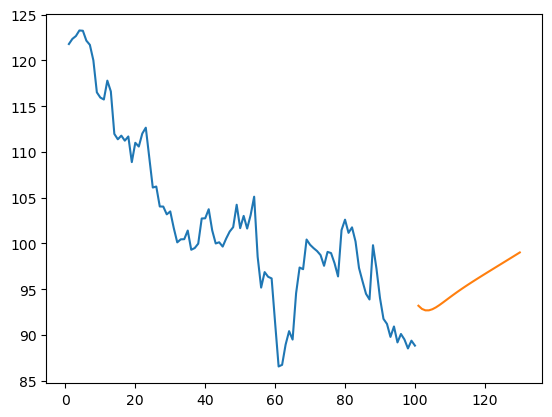

In [269]:
plt.plot(day_new,scaler.inverse_transform(df1[601:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')

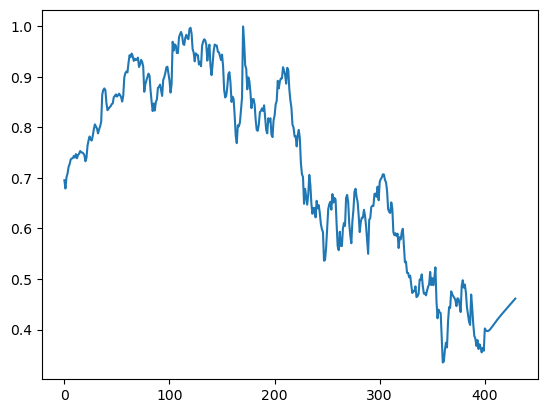

In [270]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[301:])

# google stock price from 23 Mar 2020 -30 Dec 2022 + predicted until 31 Jan 2023

In [271]:
df3=scaler.inverse_transform(df3).tolist()

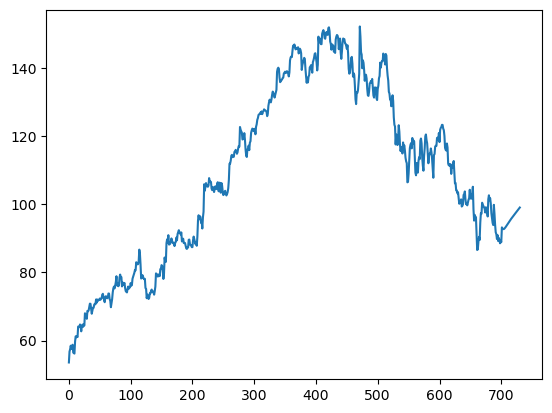

In [272]:
plt.plot(df3)

# Real google stock price from 23 March 2020 to 31 Jan 2023

In [278]:
#Import the data and remove rows containing NAN values
df4 = pd.read_csv('googfin3.csv')

df4.head()


,Date,Open,High,Low,Close,Volume
0,"Mar 23, 2020",53.07,53.57,50.68,52.83,"4,044,137"
1,"Mar 24, 2020",55.19,56.75,54.53,56.72,"3,344,450"
2,"Mar 25, 2020",56.32,57.45,54.30,55.12,"4,081,528"
3,"Mar 26, 2020",55.59,58.50,54.68,58.09,"3,573,755"
4,"Mar 27, 2020",56.28,57.53,55.30,55.54,"3,208,495"


In [279]:
df4.tail()

,Date,Open,High,Low,Close,Volume
716,"Jan 25, 2023",97.20,97.72,95.26,96.73,"31,000,850"
717,"Jan 26, 2023",98.28,99.21,96.82,99.16,"24,542,060"
718,"Jan 27, 2023",99.05,101.58,98.97,100.71,"29,020,354"
719,"Jan 30, 2023",98.75,99.41,97.52,97.95,"24,365,142"
720,"Jan 31, 2023",97.86,99.91,97.79,99.87,"22,306,778"


In [280]:
df5=df4.reset_index()['High']

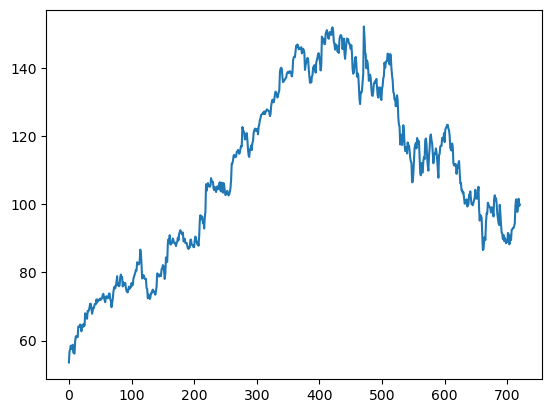

In [281]:

plt.plot(df5)